<a href="https://colab.research.google.com/github/yoobyoungcheol/AIstudy24/blob/master/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EA%B8%B0%ED%83%80%EB%8F%84%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 인공신경망을 구성하는 정차
# 1. 더미데이터 준비
# 2. 훈련용(60%) , 검정용(20%) , 데스트용(20%)으로 더미데이터 분할하기
# 3. 심층을 만듬 ( Dense )
# 4. model에 적용
# 5. compile 진행(최적화 기법을 적용 : adam)
# 6. model.fit() 훈련 진행
# 7. model.evaluate()  검증 진행

In [2]:
# 손실곡선 : fit() 메서드로 모델을 훈련하는 동안 훈련과정이 상세하게 출력되어 확인할수 있다.
#               -> ( epochs횟수, 손실, 정확도 )
# 훈련을 진행하면 훈련에 끝난 후
#      ->   <keras.src.callbacks.history.History at 0x7b87d9060310> 이 출력 메시지가 나옴
# 코랩 노트북에 코드셀은 print() 명령어를 사용하지 않아도 마지막 라인에 실행결과를 화면에 출력해준다.

# 다시말해 fit()라는 매서드는 History라는 클래스 객체를 반환 함 ( 훈련과정 지표, 손실, 정확도 등이 들어있다. )
#       -> 이값을 잘 활용하면 그래프를 그릴 수 있다.

import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

In [3]:
print(train_scaled.shape,train_target.shape)

(48000, 28, 28) (48000,)


In [4]:
print(test_input.shape,test_target.shape)

(10000, 28, 28) (10000,)


In [5]:
print(val_scaled.shape,val_target.shape)

(12000, 28, 28) (12000,)


In [6]:
def model_fn(a_layer=None):         # 모델을 만드는 간단한 함수를 정의함 (하나의 매개변수를 받아 리턴)
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100,activation='relu'))

    # model_fn() 함수에 (a_layer 매개변수로) 케라스 층을 추가하면 은닉층 뒤에 하나의 층을 추가함
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation='softmax'))
    return model

In [7]:
model = model_fn() # 위에 만든 메서드를 호출하여 모델에 담음

model.summary()     # 모델의 정보 확인

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#                           다중 분류                           정확도

In [9]:
# fit() 매서드 결과를 History 변수에 담아봄

history = model.fit(train_scaled,train_target,epochs=5,verbose=0)
# 훈련과정 출력을 조절함
# verbose=0 : 훈련결과를 나타내지 않음
# verbose=1 : 기본값 : 에포크마다 진행막대와 함께 손실등의 지표가 출력된다
# verbose=2 : 진행막대만 뺴고 출력

In [10]:
print(history.history.keys())
# 훈련 측정 값이 담겨 있는 history 딕셔너리가 존재한다
# 정확도 sccuracy, 손실 loss 값이 있다

# 정확도는 compile()메서드의 metrics 매개변수에 accuracy를 추가 했기 떄문에
# history 속성에 포함되었음

dict_keys(['accuracy', 'loss'])


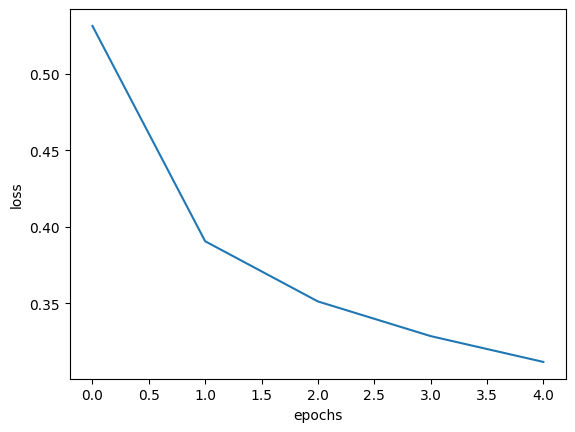

In [11]:
import matplotlib.pyplot as plt
# history속성에 포함된 손실과 정확도는 에포크마다 계산한 값이 순서대로 나열된 단순한 리스트로 맷플롯립으로 쉽게 그래프 처리가 가능
plt.plot(history.history['loss'])
plt.xlabel('epochs')
# 파이썬 인덱스는 0부터 시작함 5개의 에포크가 0~4 까지 x축에 표현
plt.ylabel('loss')
plt.show()

<ipython-input-12-f1b3a19f5f0c>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


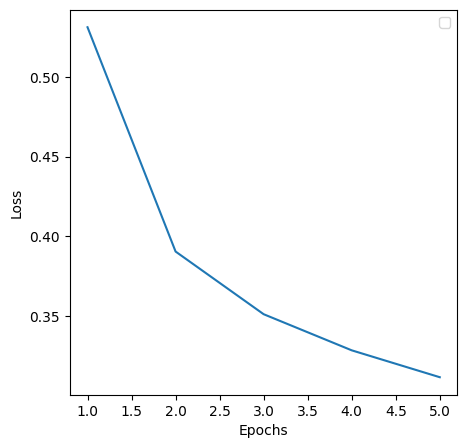

In [12]:
 # 호기심 추가코딩
def plot_loss_curve(history, total_epoch=10, start=1):
    plt.figure(figsize=(5, 5))
    plt.plot(range(start, total_epoch + 1),
             history.history['loss'][start-1:total_epoch])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss_curve(history, total_epoch=5, start=1)

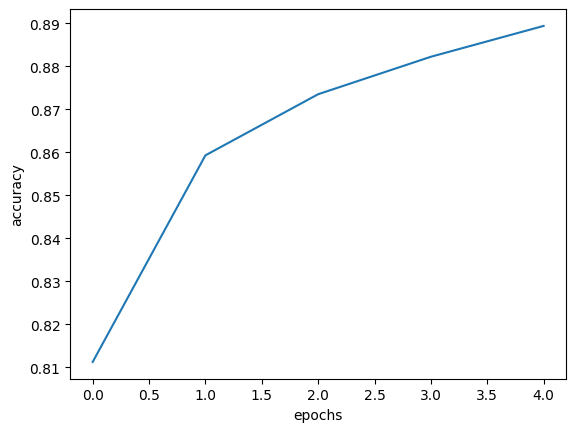

In [13]:
# 이번에는 정확도를 출력
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
# 결과 분석 : 에포크마다 손실이 감소하고 정확도가 향상됨

In [14]:
# 이번에는 epochs 횟수를 20번으로 늘려서 확인해보자

model = model_fn()  # 위에서 만든 메서드로 새로운 모델 생성(3계층 입력층 은닉층 출력층)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# history = model.fit(train_scaled,train_target,epochs=20,vervose=0)
history = model.fit(train_scaled,train_target,epochs=20,verbose=1)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7639 - loss: 0.6860
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8497 - loss: 0.4148
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8668 - loss: 0.3680
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8765 - loss: 0.3408
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8853 - loss: 0.3208
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8919 - loss: 0.3075
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8967 - loss: 0.2942
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9009 - loss: 0.2831
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9048 - loss: 0.2742
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9086 - loss: 0.2697
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9104 - loss: 0.2630
Epoch 12/20
1500/1500 ━━━━━━━━

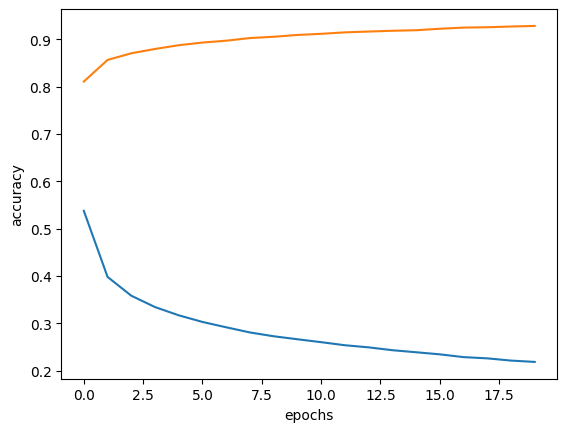

In [15]:
plt.plot(history.history['loss'])           # 손실률
plt.plot(history.history['accuracy'])       # 정확도
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [16]:
# 검증 손실
# 예전에 확률적 경사 하강법을 사용 했을 때 과대/과소 적합과 에포크 사이에 관계 부분이 있었다
# 인공 신경망은 모두 일종의 경사 하강법을 사용하기 때문에 동일한 개념이 여기에도 존재한다

# 에포크에 따른 과대적합,과소적합을 파악하려면 훈련 세트 점수과 검증세트에 대한 점수도 필요하다
# 그래서 위에처럼 훈련세트와 순실만 그리면 파악이 어렵다
# 검증 손실을 이용해서 과대/과소 적합을 응용하겠다

# keypoint
# 손실을 사용하는 것과 정확도를 사용하는 것의 차이는?
# 인공신경망 모델이 최적화하는 대상은 정확도가 아니라 손실 함수이다
# 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있는데
# 몸델이 잘 훈련 되었는지 판단하려면 정확도보다는 손실 함수의 값을 확인하는 것이 더 좋은 방법이다.

In [17]:
model = model_fn()

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled,train_target,epochs=20,verbose=1,validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7608 - loss: 0.6817 - val_accuracy: 0.8484 - val_loss: 0.4271
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8512 - loss: 0.4081 - val_accuracy: 0.8586 - val_loss: 0.3910
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8686 - loss: 0.3628 - val_accuracy: 0.8598 - val_loss: 0.3859
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8755 - loss: 0.3391 - val_accuracy: 0.8621 - val_loss: 0.3755
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8849 - loss: 0.3211 - val_accuracy: 0.8603 - val_loss: 0.3916
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8915 - loss: 0.3082 - val_accuracy: 0.8658 - val_loss: 0.3957
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8952 - loss: 0.2964 - val_accuracy: 0.8652 - val_loss: 0.3949
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9003 - loss: 0.2868 -

In [18]:
print(history.history.keys())
# 정확도 accuracy, 손실 loss 값이 있다
# 추가로 검증세트 정확도 val_accuracy, 검증세트 손실 val_loss 이 나온다

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


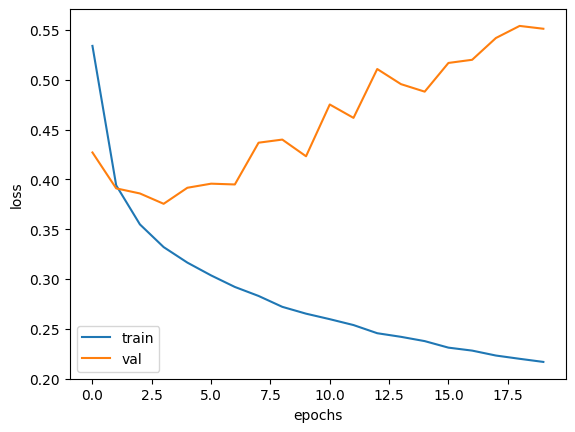

In [19]:
# 과대/과소 적합 문제를 조사하기 위해서 훈련손실 검증손실을 한그래프에 그려서 비교해보자

plt.plot(history.history['loss'])           # 손실률
plt.plot(history.history['val_loss'])       # 정확도
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
# 결과 분석 : 초기에 검증 손실이 감소하다가 다섯 번쨰 에포크 만에 다시 상승함
# 훈련손실은 꾸준히 감소하기 때문에 과대적합 모델이 만들어짐
# 검증 손실이 상승하는 시점을 가능한 늦추면 세트에 대한 손실이 줄어들고
# 거증세트에 대한 정확도가 증가할거 같다

# 과대 적합을 막기위한 방법으로 예전에 사용했던 규제방식대신에
# 신경망에 특화된 규제방법(드롭아웃)을 나중에 해보자

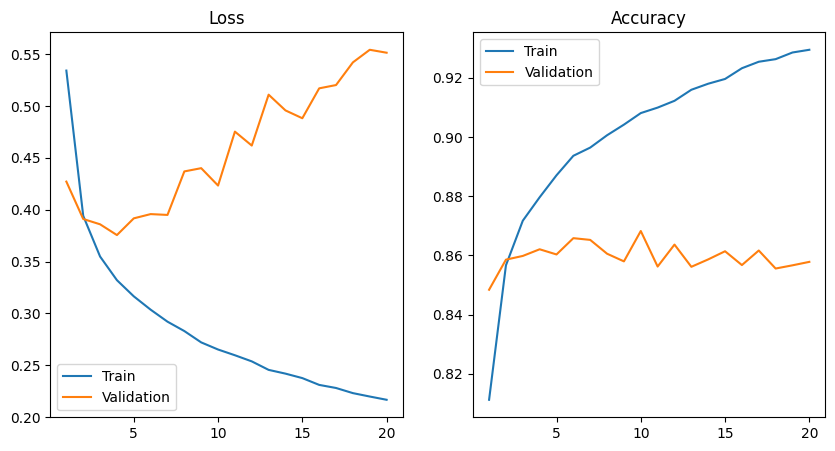

In [20]:
# 호기심 추가 코딩
start=1
end = 20

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(range(start, end+1), history.history['loss'][start-1:end],
             label='Train')
axes[0].plot(range(start, end+1), history.history['val_loss'][start-1:end],
             label='Validation')
axes[0].set_title('Loss')
axes[0].legend()

axes[1].plot(range(start, end+1), history.history['accuracy'][start-1:end],
             label='Train')
axes[1].plot(range(start, end+1), history.history['val_accuracy'][start-1:end],
             label='Validation')
axes[1].set_title('Accuracy')
axes[1].legend()
plt.show()

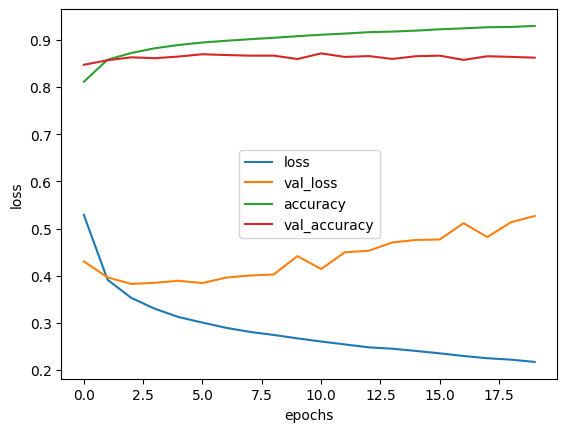

In [21]:
# 지금은 옵티마이져 하이퍼파라미터를 조절하여 과대 적합을 완화시켜본다
# RMSprop 옵티마이져는 많은 문제에서 잘 ~ 동작합니다 . -> 다른 방법으로는 Adam이 있다

model = model_fn()

model.compile(optimizer='RMSprop' ,loss='sparse_categorical_crossentropy', metrics=['accuracy'])   # RMSprop 기법으로 최적화 후 차트로 보자

history = model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))

plt.plot(history.history['loss'])           # 손실률
plt.plot(history.history['val_loss'])       # 검증 손실
plt.plot(history.history['accuracy'])       # 정확도
plt.plot(history.history['val_accuracy'])   # 검증 정확도
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.show()

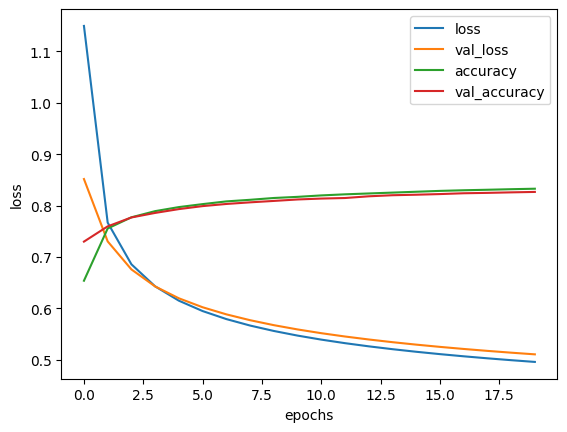

In [22]:
model = model_fn()
adagrad = keras.optimizers.Adagrad()

model.compile(optimizer='adagrad' ,loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Adagrad 기법으로 최적화 후 차트로 보자

history = model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))

plt.plot(history.history['loss'])           # 손실률
plt.plot(history.history['val_loss'])       # 검증 손실
plt.plot(history.history['accuracy'])       # 정확도
plt.plot(history.history['val_accuracy'])   # 검증 정확도
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.show()

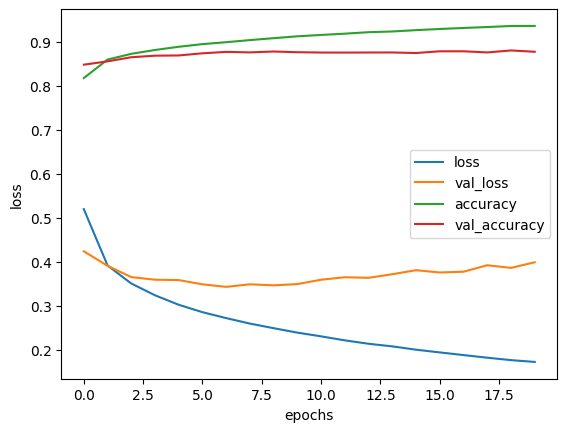

In [23]:
model = model_fn()
adagrad = keras.optimizers.Adagrad()

model.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy', metrics=['accuracy'])    # Adam 기법으로 최적화 후 차트로 보자

history = model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))

plt.plot(history.history['loss'])           # 손실률
plt.plot(history.history['val_loss'])       # 검증 손실
plt.plot(history.history['accuracy'])       # 정확도
plt.plot(history.history['val_accuracy'])   # 검증 정확도
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.show()

In [24]:
# 드롭 아웃 (Dropout)은 딥러닝의 기초가되는 대프리 힌턴이 소개하였다
# 룬현과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 (뉴런 출력을 0으로 만듬) 과대 적합을 막음

# 어떤 샘플을 처리할 때 은닉층의 두번째 뉴런이 드롭아웃이 되어 h2 출력이 없음
# 다른 샘플을 처리할 때는 은닉층의 첫번째 뉴런이 드롭아웃 되어 h1 출력이 없음
# 뉴런은 랜검하게 드롭아웃 되고 얼마나 많은 뉴런을 드롭할지 우리가 하이퍼파라미터에 정할 것이다

# 드롭 아웃이 왜 과대 적합을 막을 수 있을지 생각을 해보면 이전 층의 일부 뉴런이 랜덤하게 꺼지면
# 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 한다
# 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있는 것이다.

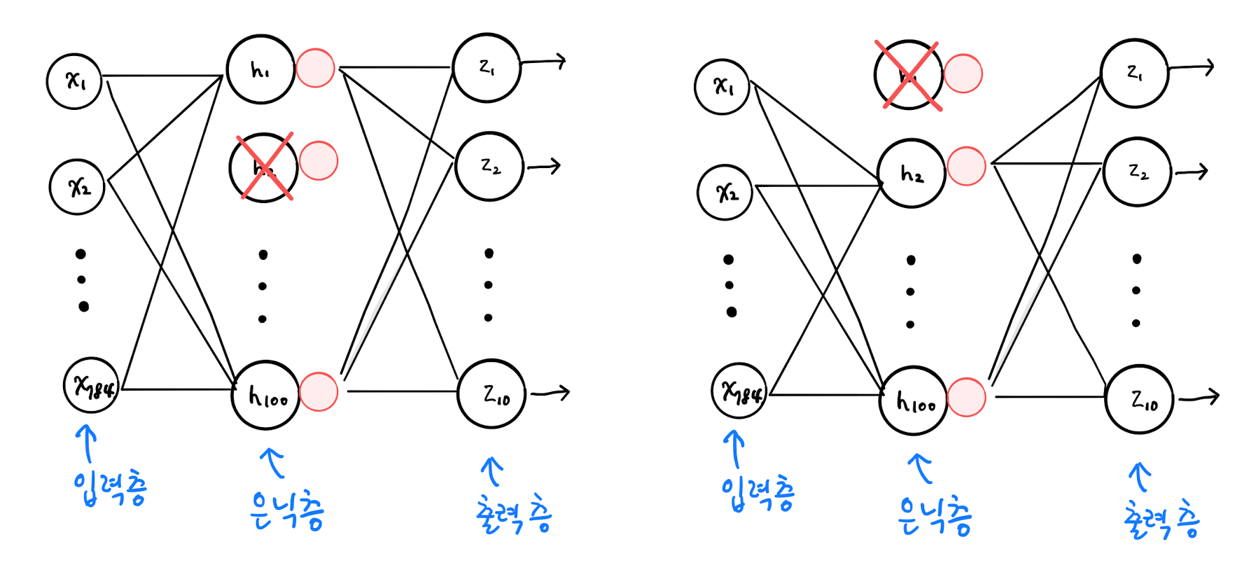

In [25]:
# 또 다른 분석
# 앞의 드롭아웃이 적용된 2개의 신경망 그림을 보면 드롭아웃을 적용해 훈련하는 것은 마치 2개의 신경망을 앙상블하는 것 처럼 상상하게 됨
# 앙상블 : 더 좋은 예측을 만들기 위해 여러 개의 모델을 3훈련하는 머신러닝 알고리즘
#       -> 과대적합을 막아주는 좋은 기법

# 케라스에서 드롭아웃을 keras.layers.Dropout로 제공함
# 어떤 층의 뒤에 드롭아웃을 두어 이층의 출력을 랜덤하게 0으로 만듬
# 드롭아웃이 층처럼 사용되지만 훈련되는 파라미터는 없음

# model_fn 함수에 드롭아웃 객체를 전달하여 층을 추가함
model = model_fn(keras.layers.Dropout(0.3))

model.summary()# 모델 정보 확인
# 은닉층 뒤에 추가된 드롭아웃 총 (3번째 값)은 훈련되는 모델 파라미터가 없음
# 입력과 출력의 크기가 같음
# 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않음

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

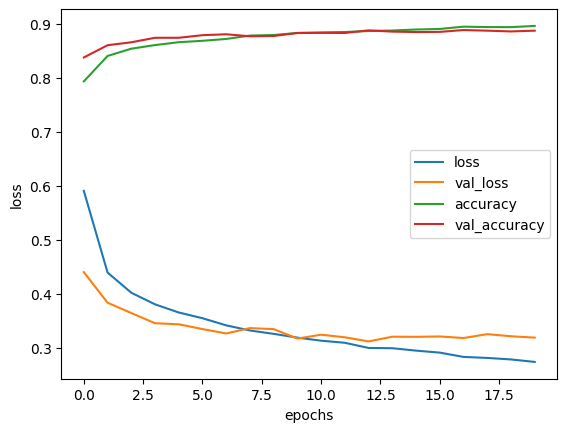

In [26]:
# 주의사항 : 훈련이 끝난뒤 평가나 예측을 수핼할 때는 드롭아웃을 적용하지 않는다
# 훈련된 모든 뉴런을 사용해야 올바른 예측이 수행된다
# 텐서플로와 케라스는 모델이 평가와 예측을 수행할 때 자동으로 드롭아웃을 적용하지 않는다
model.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련손실과 검증손실, 정확도와 검증 정확도를 그려보자
history = model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))

plt.plot(history.history['loss'])           # 손실률
plt.plot(history.history['val_loss'])       # 검증 손실
plt.plot(history.history['accuracy'])       # 정확도
plt.plot(history.history['val_accuracy'])   # 검증 정확도
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.show()

# 과대 적합이 확실히 줄어 듬 10번쨰 에포크가 검증 손실의 감소가 멈추지만 크게 상승하지 ㅏㄶ음
 # 20번의 에포크를 실행해서 결국 과대 적합이 되었음 -> 10번만 해보자

In [27]:
# 차후에 재활용하기 위해서 모델 저장과 복원도 해본다
model = model_fn(keras.layers.Dropout(0.3))

model.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련손실과 검증손실, 정확도와 검증 정확도를 그려보자
history = model.fit(train_scaled,train_target,epochs=10,verbose=0,validation_data=(val_scaled,val_target))

model.save('model-whole.keras') # 모델 저장

# 케라스 모델은 훈련된 모델의 파라미터를 저장하는 sava_weights() 매서드가 있다
# 텐서플로의 체크포인트 포멧으로 저장하지만  ### https://www.tensorflow.org/guide/checkpoint?hl=ko
# .h5일 경우 HDF5포맷으로 저장함             ### https://geunuk.tistory.com/466

In [28]:
model.save_weights('model.weights.h5')

In [29]:
# 이제는 저장한 모델을 불러와 테스트를 진행 해보자

In [30]:
!ls -al model*

-rw-r--r-- 1 root root 971928 Jan 13 01:15 model.weights.h5
-rw-r--r-- 1 root root 974765 Jan 13 01:15 model-whole.keras


In [31]:
# 실험 1
# 훈련화지 않은 새로운 모델을 만들고 model.weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용해보자

# model_fn() 위와 동잉한 모델
model = model_fn(keras.layers.Dropout(0.3)) # 훈련하지 않은 새로운 모델

model.load_weights('model.weights.h5') # 이전에 저장했던 모델 파라미터를 로딩
# 이때 사용되는 매서드는 save_weights() 와 쌍을 이루는 load_weights매서드이다
# 주의 사항 : load_weights()매서드를 사용하려면 save_weights()매서드로 저장했던 모델과 정확히 같은(★) 구조를 가져야한다

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# 모델의 검증 정확도를 확인 해보자
import numpy as np

# predict()매서드는 사이킷런과 다른 샘플마다 10개의 클래스에 대한 확률을 반환 ( 다중분류 )
# 패션 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플수는 12,000개이기 떄문에
# predict()매서드는 (12000,10)크기의 배열을 반환
# 10개의 확률 중 가장 큰 값의 인덱스를 골라 (.argmax)타깃 레이블과 비교하여 정확도를 계산해보자

val_labels = np.argmax(model.predict(val_scaled),axis=-1)
# axis=-1 배열의 마지막 차원을 따라 최대값을 고름
# 검증 세트는 2차원 배열이기 때문에 마지막차원은 1이 된다
# 예를 들어 아래 그림처럼 5*3배열에 axis=1로 한값과 axis=0으로 한값의 인덱스를 반환함

# argmax()로 고른 인텍스(val_labels)와 타깃(val_target)을 비교하여 같으면 1이되고 다르면 0이됨
# 이를 평균으로 출력해 봄(정확도)
print(np.mean(val_labels == val_target))    # 87.96% 평균

# axis = 1 이면 열을 따라 각 행의 최대값의 인덱스를 선택하고
# axis = 0 이면 행을 따라 각 열의 최대값의 인덱스를 선택한다
# 그 다음 라인은 argmax()로 고른 인덱스(val_labels)와 타깃(val_target)을 비교
#   -> 두 배열에서 각 위치의 값이 같으면 1, 다르면 0 (평균하면 정확도가 됨)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.8820833333333333


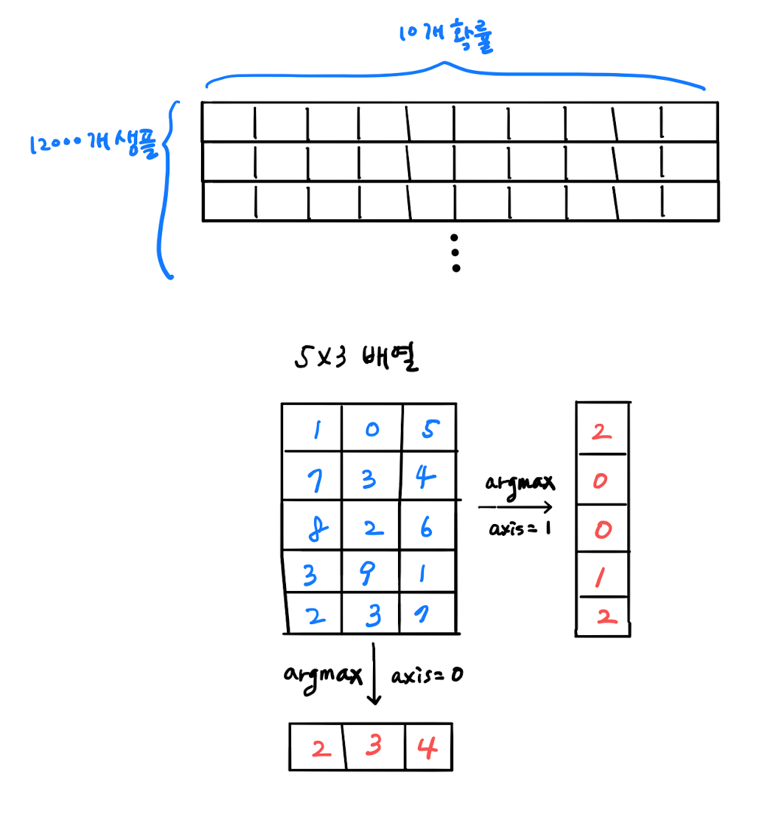

In [33]:
# .keras확장자로된 모델을 불러오자
# 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력해보자
model = keras.models.load_model('model-whole.keras') # load_model() 지정된 케라스 파일 읽기

model.evaluate(val_scaled,val_target) # 같은 모델을 불러 들였기 때문에 위와 정확도가 같음

# 현 상태 분석 : 20번의 에포크 동안 모델을 훈련하여 검증 점수가 성늘하는 지점을 확인
# 모델을 과대적합 되지 않을 에포크만큼 다시 훈련함
# 모델을 두번씩 훈련하지 않고 한번에 끝나는 방법을 연구 해보자 -> 케라스 콜백

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8839 - loss: 0.3245


[0.3234425485134125, 0.8820833563804626]

In [34]:
# 실험 2
# 아예 파일로 새로운 모델을 만들고 바로 사용해보자
# 추가적으로 콜백이라는 것을 활용해보자
# 콜백 : 흔랸 과정 중간에 어떤 작업을 수행할수 있게 하는 객체 keras.callback패키지에 있다
# fit() 매서드의 callback 매개변수에 리스트로 전달하여 사용
# 지금 우리가 사용할 콜백은 modelCheckpoint 콜백으로 에포크마다 모델을 저장한다
# save_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있다.

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
                                    # binary_crossentropy 이중분류

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',save_best_only=True)

model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target),callbacks=checkpoint_cb)
# 모델 훈련후 best-model.keras에 최상의 검증 점수를 낸 모델이 저장됨

In [35]:
model = keras.models.load_model('best-model.keras')
# load_model로 저장했던 값을 불러와 다시 예측 실행

model.evaluate(val_scaled,val_target)
# keras.callbacks.ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장해 주었음
# 여전히 20번의 에포크 동안 훈련을 진행함
# 사실 검증 점수가 상승하기 시작하면 그 이후에는 과대 적합이
# 더 커지기 때문에  훈련을 계속할 필요가 없음
# 이때 훈련을 종료하면 자원과 시간을 아낄 수 있음 -> 조기종료(EarlyStopping)
# 조기 종료는 딥러닝 분야에 많이 사용하는 기법이다
# 에포크의 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아주기도한다 - 규제방법중 하나이다.

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8860 - loss: 0.3188


[0.31857502460479736, 0.8833333253860474]

In [36]:
# 케라스에는 조기종료를 위한 EarlyStopping 콜백을 제공함
# 이 콜백의 patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 함수로 지정
# patience=2 2번의 연속 검증 점수가 향상되지 않으면 훈련을 중지 (patience:인내심)
# restore_best_weights=True -> 가장 낮은 검증 손실을 낸 모델 파라미터로 돌림

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',save_best_only=True)

# 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증손실이 다시 상승할때 훈련을 중지할 수 있음
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

# 훈련을 중지하고 현재 모델의 파라미터를 최상의 파라미터로 되돌림
history = model.fit(train_scaled,train_target,epochs=20,verbose=1,validation_data=(val_scaled,val_target),callbacks=([checkpoint_cb,early_stopping_cb]))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7306 - loss: 0.7712 - val_accuracy: 0.8453 - val_loss: 0.4242
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8374 - loss: 0.4548 - val_accuracy: 0.8577 - val_loss: 0.3833
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8518 - loss: 0.4145 - val_accuracy: 0.8689 - val_loss: 0.3652
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8591 - loss: 0.3873 - val_accuracy: 0.8707 - val_loss: 0.3498
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8643 - loss: 0.3715 - val_accuracy: 0.8758 - val_loss: 0.3409
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8700 - loss: 0.3553 - val_accuracy: 0.8762 - val_loss: 0.3371
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8720 - loss: 0.3484 - val_accuracy: 0.8788 - val_loss: 0.3320
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8757 - loss: 0.3386 - 

In [37]:
print(early_stopping_cb.stopped_epoch)

8


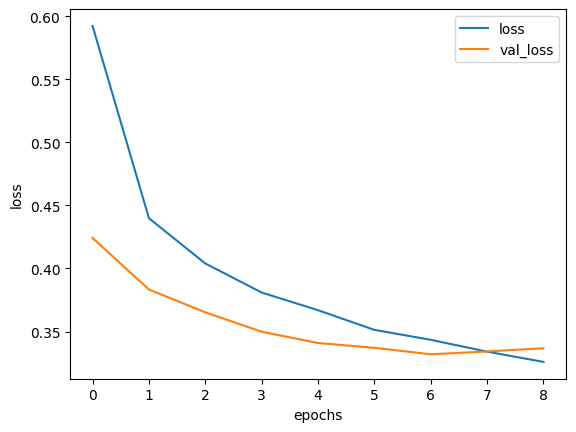

In [38]:
plt.plot(history.history['loss'])           # 손실률
plt.plot(history.history['val_loss'])       # 검증 손실
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss','val_loss'])
plt.show()

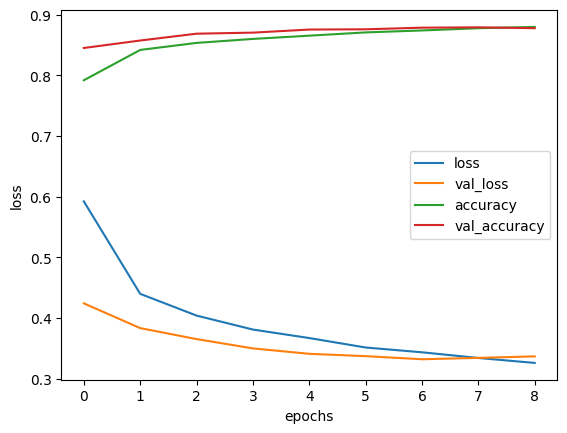

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8808 - loss: 0.3309


[0.33195021748542786, 0.8788333535194397]

In [39]:
plt.plot(history.history['loss'])           # 손실률
plt.plot(history.history['val_loss'])       # 검증 손실
plt.plot(history.history['accuracy'])       # 정확도
plt.plot(history.history['val_accuracy'])   # 검증 정확도
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.show()

model.evaluate(val_scaled,val_target) # 검증세트의 성능 확인 (33,10% 87.99%) 에포크 9번
# 컴퓨터의 자원과 시간을 아끼고 콜백과 함께 사용하면 최상의 모델을 자동으로 저장해 준다는 것을 명심하자